In [50]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [51]:
def load_and_preprocess_data(file_path):
    data = pd.read_csv(file_path)
    
    # Separate features and target (for evaluation purposes only)
    X = data.drop('Class', axis=1)
    y = data['Class']
    
    # Standardize features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    return X_scaled, y

In [52]:
file_path = r"D:\AIMLTaskIVBack\archive\creditcard.csv" 
X_scaled, y = load_and_preprocess_data(file_path)

In [53]:
# start Training Isolation Forest
print("Training Isolation Forest...")
iso_forest = IsolationForest(n_estimators=100, contamination=0.0017, random_state=42)
iso_forest.fit(X_scaled)


Training Isolation Forest...


IsolationForest(contamination=0.0017, random_state=42)

In [54]:
# Predict anomalies in dataset
y_pred = iso_forest.predict(X_scaled)
# Convert predictions as given: -1 (anomalies) -> 1 (fraud), 1 (normal) -> 0 (non-fraud)
y_pred = np.where(y_pred == -1, 1, 0)

In [55]:
# Step --    Evaluate Results
print("Evaluation of Isolation Forest:")
print(classification_report(y, y_pred, target_names=["Non-Fraud", "Fraud"]))



Evaluation of Isolation Forest:
              precision    recall  f1-score   support

   Non-Fraud       1.00      1.00      1.00    284315
       Fraud       0.26      0.25      0.26       492

    accuracy                           1.00    284807
   macro avg       0.63      0.63      0.63    284807
weighted avg       1.00      1.00      1.00    284807



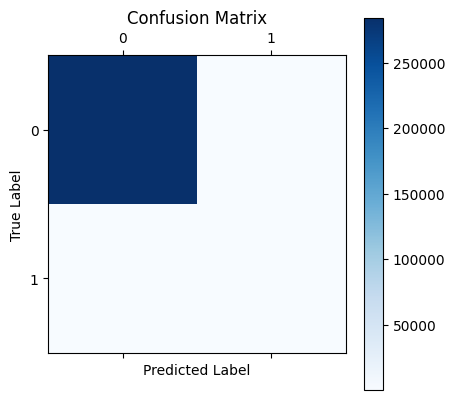

In [56]:
# Confusion Matrix as givemn
conf_matrix = confusion_matrix(y, y_pred)
plt.matshow(conf_matrix, cmap='Blues')
plt.title("Confusion Matrix")
plt.colorbar()
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

In [57]:
# To Analyze Detected Anomalies or
# Calculate proportion of anomalies
n_anomalies = np.sum(y_pred == 1)
total_samples = len(y_pred)


In [58]:
print(f"Number of Anomalies Detected: {n_anomalies}/{total_samples}")
print(f"Proportion of Anomalies: {n_anomalies / total_samples:.4f}")

Number of Anomalies Detected: 485/284807
Proportion of Anomalies: 0.0017


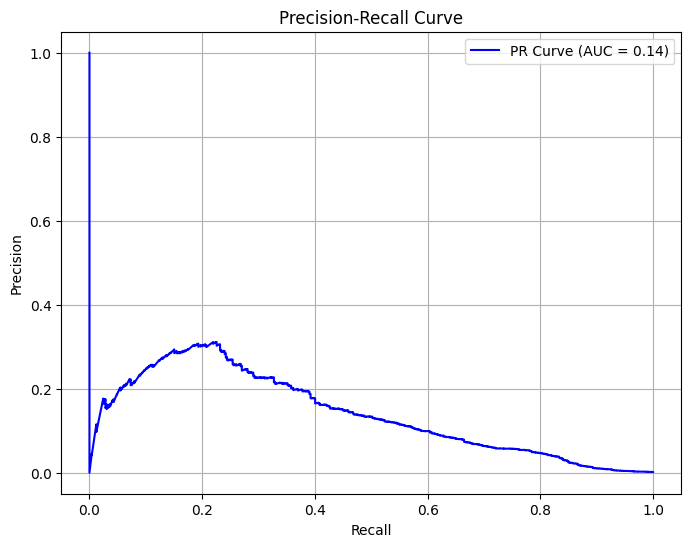

In [59]:
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

# Predict probabilities for the positive class (Fraud)
# Isolation Forest does not provide probabilities directly, but we can use decision_function
# Negative decision_function values indicate anomalies.
scores = iso_forest.decision_function(X_scaled)
# Convert decision scores to probabilities (higher score = higher normality)
probabilities = -scores  # Reverse sign to treat anomalies as positive class

# Generate Precision-Recall curve
precision, recall, thresholds = precision_recall_curve(y, probabilities)
pr_auc = auc(recall, precision)

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f"PR Curve (AUC = {pr_auc:.2f})", color='blue')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="best")
plt.grid()
plt.show()


## Implementing AutoEncoders Deep Learning Model as we are getting very low AUC

In [66]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam


In [67]:
data = pd.read_csv(file_path) 

X = data.drop(columns=["Class"])  
y = data["Class"]                 # Target variable: 0 = Non-Fraud, 1 = Fraud

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_non_fraud = X_scaled[y == 0]

# Split non-fraud data into training and validation sets
X_train, X_val = train_test_split(X_non_fraud, test_size=0.2, random_state=42)


In [68]:
# Define the autoencoder architecture
input_dim = X_train.shape[1]

input_layer = Input(shape=(input_dim,))
encoder = Dense(64, activation="relu")(input_layer)
encoder = Dense(32, activation="relu")(encoder)
bottleneck = Dense(16, activation="relu")(encoder)

decoder = Dense(32, activation="relu")(bottleneck)
decoder = Dense(64, activation="relu")(decoder)
output_layer = Dense(input_dim, activation="sigmoid")(decoder)

# Combine into an autoencoder model
autoencoder = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss="mse")

autoencoder.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 30)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 32)                  │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 30)                  │           1,950 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,198 (35.93 KB)

 Trainable params: 9,198 (35.93 KB)

 Non-trainable params: 0 (0.00 B)

In [63]:

# Train the autoencoder
history = autoencoder.fit(
    X_train, X_train, 
    epochs=50,
    batch_size=256,
    validation_data=(X_val, X_val),
    verbose=1
)


Epoch 1/50
889/889 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.8989 - val_loss: 0.7468
Epoch 2/50
889/889 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.7396 - val_loss: 0.7203
Epoch 3/50
889/889 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.7130 - val_loss: 0.7128
Epoch 4/50
889/889 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.7019 - val_loss: 0.7095
Epoch 5/50
889/889 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.7078 - val_loss: 0.7062
Epoch 6/50
889/889 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.7076 - val_loss: 0.7019
Epoch 7/50
889/889 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.6898 - val_loss: 0.6986
Epoch 8/50
889/889 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.6918 - val_loss: 0.6965
Epoch 9/50
889/889 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.6832 - val_loss: 0.6949
Epoch 10/50
889/889 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.6913 - val_loss: 0.6932
Epoch 11/50
889/889 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.6895 - val_loss: 0.6913
Epoch 12/50
889/889 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step

In [64]:

# Calculate reconstruction error for training data
X_train_reconstructed = autoencoder.predict(X_train)
train_mse = np.mean(np.square(X_train - X_train_reconstructed), axis=1)

# Determine a threshold for anomalies (e.g., 95th percentile of train errors)
threshold = np.percentile(train_mse, 95)

# Apply the model to all data
X_reconstructed = autoencoder.predict(X_scaled)
reconstruction_errors = np.mean(np.square(X_scaled - X_reconstructed), axis=1)

# Classify anomalies
y_pred = (reconstruction_errors > threshold).astype(int)


7108/7108 ━━━━━━━━━━━━━━━━━━━━ 6s 841us/step
8901/8901 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step


              precision    recall  f1-score   support

   Non-Fraud       1.00      0.95      0.97    284315
       Fraud       0.03      0.87      0.06       492

    accuracy                           0.95    284807
   macro avg       0.51      0.91      0.52    284807
weighted avg       1.00      0.95      0.97    284807



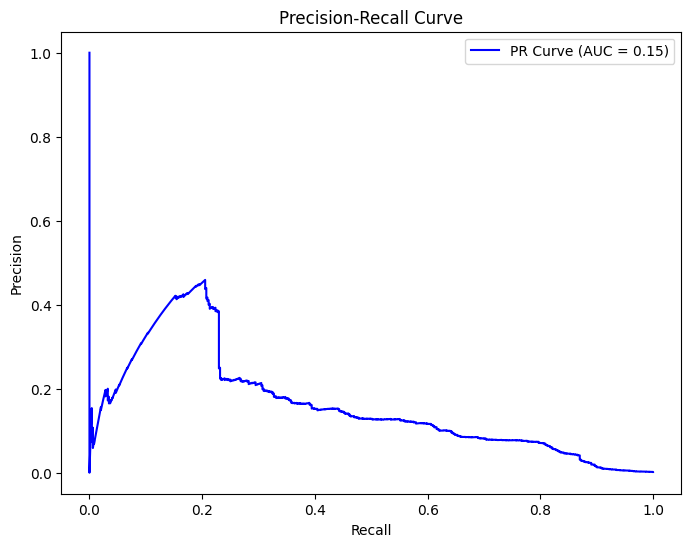

In [65]:
from sklearn.metrics import classification_report, precision_recall_curve, auc

# Classification report
print(classification_report(y, y_pred, target_names=["Non-Fraud", "Fraud"]))

# Precision-Recall curve
precision, recall, _ = precision_recall_curve(y, reconstruction_errors)
pr_auc = auc(recall, precision)

# Plot the Precision-Recall curve
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f"PR Curve (AUC = {pr_auc:.2f})", color="blue")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()
